In [89]:
# Required Python Machine learning Packages
import pandas as pd
import numpy as np

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

## analysis for data

In [90]:
pre_sur = pd.read_csv("pre_study_survey.csv")
post_rec = pd.read_csv("post_task_recommender.csv")
post_ser = pd.read_csv("post_task_search.csv")
post_sur = pd.read_csv("post_study_survey.csv")
# post study survey doesnt fit in out data evaluation because the scale for that is from 1- 100, and i think it makes sense to center and scale it but i dont know, because we have never center and scaled data then used it 
df = pd.concat([pre_sur, post_rec, post_ser]) 
df

C:\Users\paige\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,...,Q4,Q5,Q6,Q7,Q8,Q9,Timestamp,User_ID,team,timestamp
0,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1,5,5,5,5,2019-11-11 19:23:00,JNMM,red,NaN
1,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,2,5,5,4,3,2019-11-11 19:23:15,ROGI,blue,NaN
2,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,3,5,5,4,4,2019-11-11 19:23:31,SK9V,green,NaN
3,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,4,5,5,4,3,2019-11-11 19:23:41,BBRP,blue,NaN
4,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,1,4,5,3,2,2019-11-11 19:23:55,OAEG,blue,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,4,4,2.0,3.0,2.0,4.0,4.0,NaN,NaN,NaN,...,2,3,3,3,3,3,NaN,TJLN,green,2019-11-11 19:42:08
38,4,4,4.0,5.0,3.0,3.0,4.0,NaN,NaN,NaN,...,4,4,4,4,4,4,NaN,TYNN,yellow,2019-11-11 19:53:44
39,4,4,4.0,4.0,3.0,4.0,4.0,NaN,NaN,NaN,...,4,4,4,4,4,4,NaN,WOTF,green,2019-11-11 19:39:55
40,4,4,4.0,4.0,2.0,3.0,5.0,NaN,NaN,NaN,...,4,4,4,4,4,4,NaN,ZCNM,yellow,2019-11-11 19:39:08


In [91]:
df.corr()

,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q2,Q20,Q3,Q4,Q5,Q6,Q7,Q8,Q9
Q1,1.000000,0.388017,0.281176,0.492259,0.290704,0.161294,5.289153e-02,0.391439,0.132878,0.168219,0.353914,-1.766646e-01,0.205312,-0.136906,-0.204097,0.523439,-0.210640,-0.110838,0.237654,0.498014
Q10,0.388017,1.000000,0.329234,0.520898,0.191228,0.088436,9.840497e-02,0.144936,-0.147621,-0.009755,-0.009044,3.445109e-02,-0.045522,-0.073317,-0.068506,0.214718,0.030225,-0.038285,0.426176,0.543476
Q11,0.281176,0.329234,1.000000,0.540681,0.430666,0.235076,3.914228e-02,0.280365,-0.260986,0.164833,-0.060268,5.895595e-01,-0.017334,0.288434,0.488721,0.490216,0.468095,0.468137,0.456941,0.459107
Q12,0.492259,0.520898,0.540681,1.000000,0.362190,0.179954,2.085254e-01,0.437588,-0.156291,0.294740,0.195925,5.487051e-01,0.051903,0.531633,0.441428,0.601444,0.372617,0.634460,0.556835,0.478428
Q13,0.290704,0.191228,0.430666,0.362190,1.000000,0.574227,9.896051e-02,0.120520,-0.298911,0.449362,0.142434,4.151803e-01,0.172062,0.434607,0.289727,0.315837,0.269779,0.571261,0.318387,0.418194
Q14,0.161294,0.088436,0.235076,0.179954,0.574227,1.000000,2.158430e-01,0.073433,-0.270178,0.295930,0.153034,3.407808e-01,0.070425,0.294029,0.099286,0.243856,0.086003,0.286536,0.058819,-0.012251
Q15,0.052892,0.098405,0.039142,0.208525,0.098961,0.215843,1.000000e+00,0.220911,0.030907,0.177276,0.196171,1.260331e-17,-0.117421,0.179769,0.342622,0.155396,0.193754,0.170155,-0.049281,0.094093
Q16,0.391439,0.144936,0.280365,0.437588,0.120520,0.073433,2.209106e-01,1.000000,0.032265,0.331535,0.304413,3.641450e-01,0.230829,0.344815,0.127743,0.545098,0.202250,0.496762,0.156561,0.335396
Q17,0.132878,-0.147621,-0.260986,-0.156291,-0.298911,-0.270178,3.090704e-02,0.032265,1.000000,-0.019389,0.436564,-2.909712e-01,0.072385,0.066718,-0.089361,-0.054078,-0.262752,-0.011554,0.017577,0.033371
Q18,0.168219,-0.009755,0.164833,0.294740,0.449362,0.295930,1.772764e-01,0.331535,-0.019389,1.000000,0.440702,1.698433e-01,0.535720,0.200598,0.206675,0.325186,0.151924,0.279244,0.321161,0.228454


we use the page search engine to find correlation values that are higher than 0.6, and we consider it as high correlation

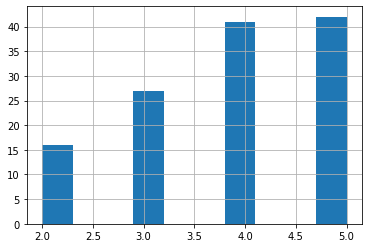

In [37]:
df['Q3'].hist()

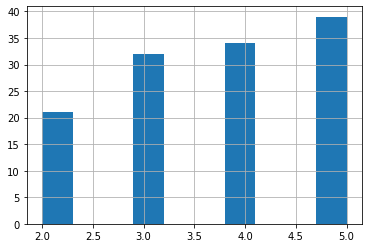

In [38]:
df['Q4'].hist()

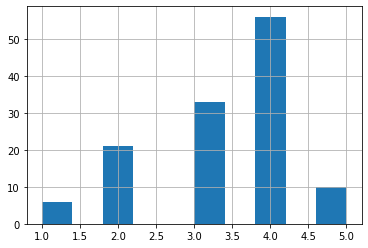

In [39]:
df['Q5'].hist()

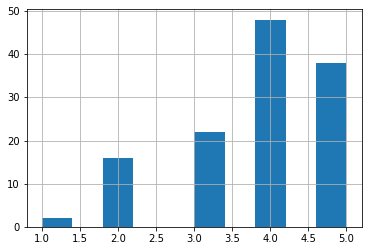

In [33]:
df['Q6'].hist()

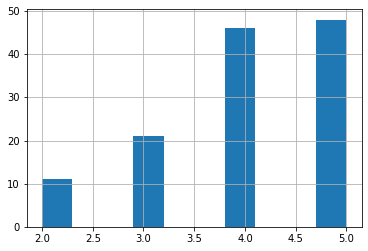

In [40]:
df['Q7'].hist()

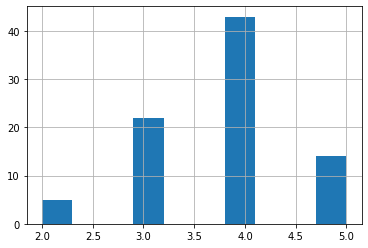

In [41]:
df['Q12'].hist()

## analysis for log

In [46]:
queries = pd.read_csv("queries.csv")
res_de = pd.read_csv("researcher_details.csv")
criteria = pd.read_csv("criteria.csv")


In [45]:
criteria.corr()

,Q1,Q2,Q3,Q4,Q5
Q1,1.000000,0.023998,0.004512,-0.126626,-0.033610
Q2,0.023998,1.000000,-0.167150,-0.048974,-0.146567
Q3,0.004512,-0.167150,1.000000,-0.028237,0.046663
Q4,-0.126626,-0.048974,-0.028237,1.000000,-0.045426
Q5,-0.033610,-0.146567,0.046663,-0.045426,1.000000


In [ ]:
# data visualization for rest of the log data doesnt make sense, because they are mostly labels.

## clustering survey data

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)

In [55]:
X = df[['Q3','Q5', 'Q7']]
y = df[['Q12']]

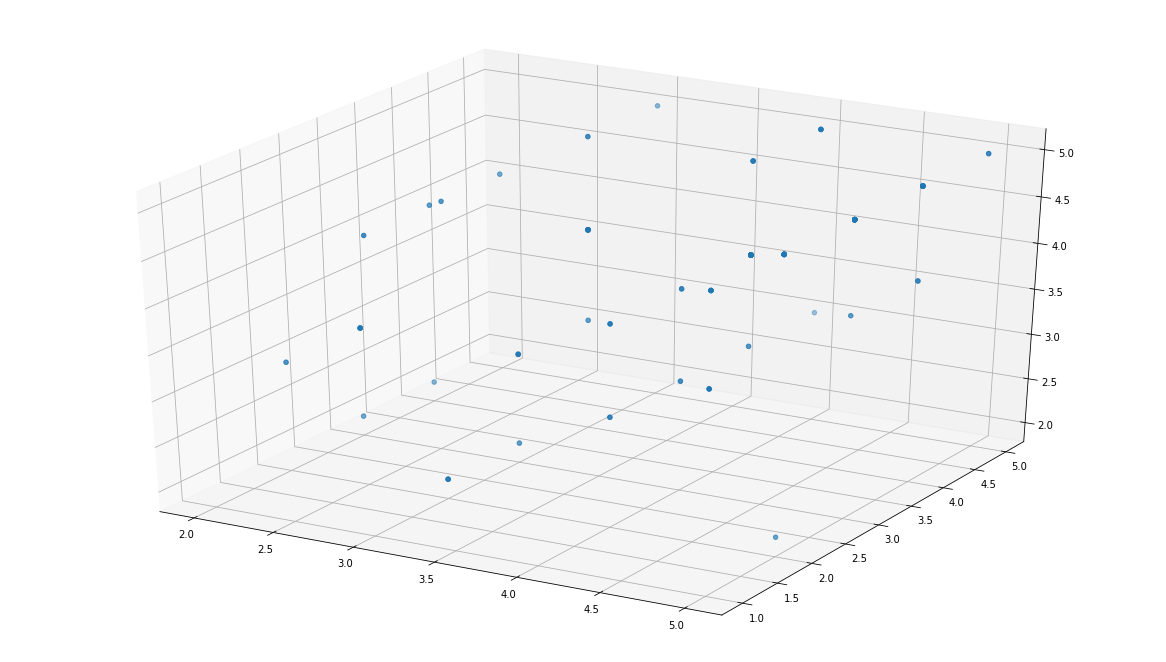

In [57]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X['Q3'], X['Q5'], X['Q7'])

## when K = 3

In [58]:
# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)

[[2.74193548 2.90322581 2.70967742]
 [3.91935484 4.12903226 4.27419355]
 [4.81818182 2.27272727 4.84848485]]


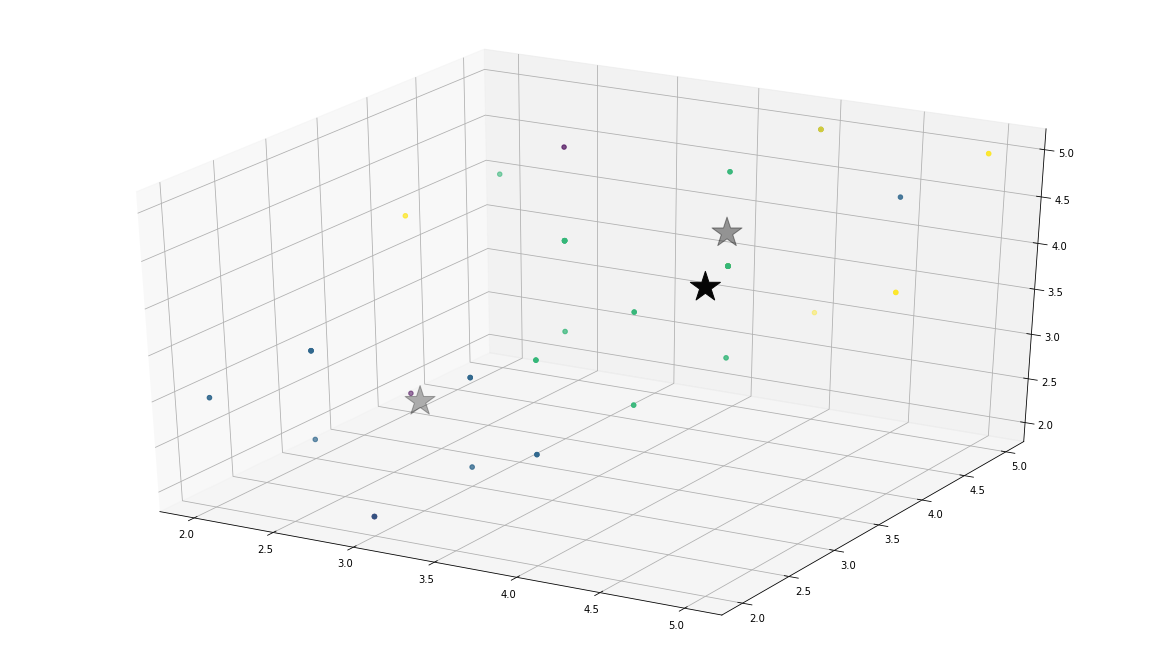

In [59]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X['Q3'], X['Q5'], X['Q7'], c=y['Q12'])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

## when K = 2

In [76]:
# Initializing KMeans
kmeans = KMeans(n_clusters=2)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)

[[4.8125     2.85416667 4.85416667]
 [3.28205128 3.64102564 3.53846154]]


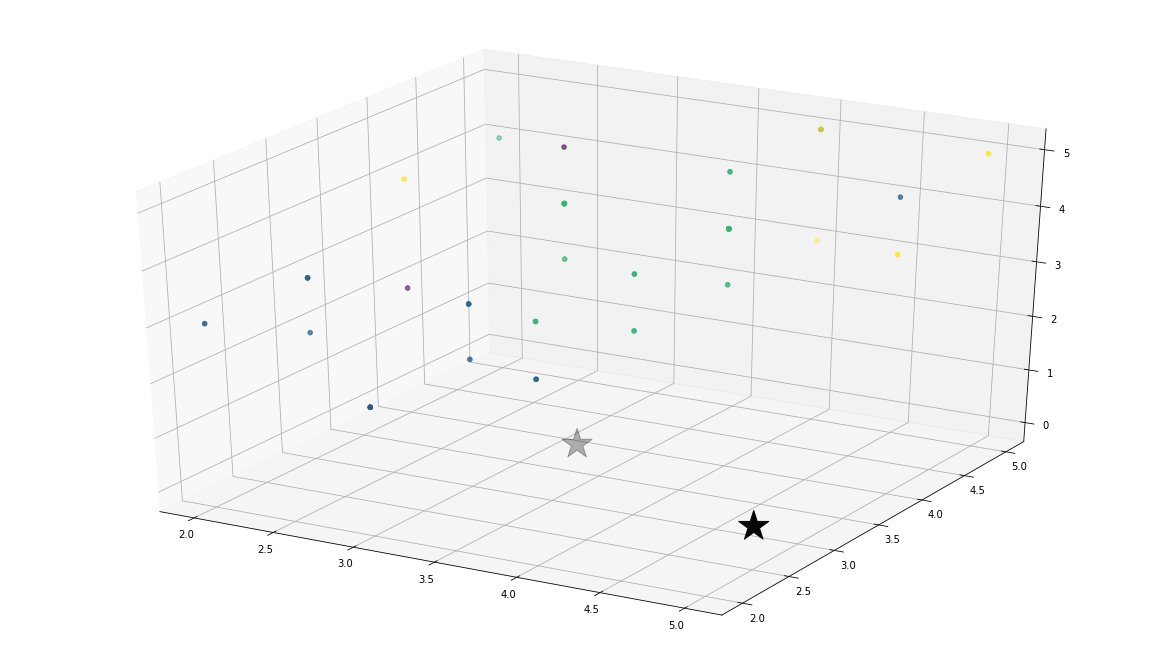

In [77]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X['Q3'], X['Q5'], X['Q7'], c=y['Q12'])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

## When K = 4

In [68]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)

[[3.54901961 4.11764706 4.03921569]
 [4.66666667 1.66666667 4.77777778]
 [4.9        3.56666667 4.9       ]
 [2.77777778 2.74074074 2.59259259]]


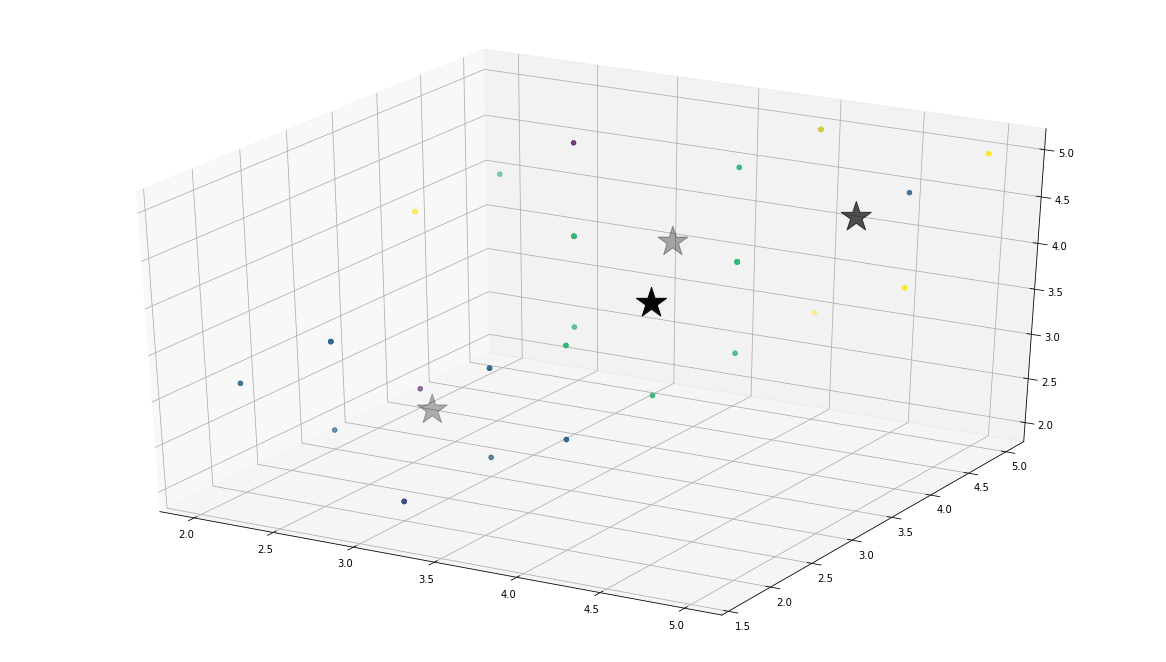

In [69]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X['Q3'], X['Q5'], X['Q7'], c=y['Q12'])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

## when K = 5

In [70]:
# Initializing KMeans
kmeans = KMeans(n_clusters=5)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)

[[4.66666667 1.66666667 4.77777778]
 [2.78947368 4.15789474 4.05263158]
 [4.1025641  4.12820513 4.15384615]
 [2.77777778 2.74074074 2.59259259]
 [5.         3.34782609 4.95652174]]


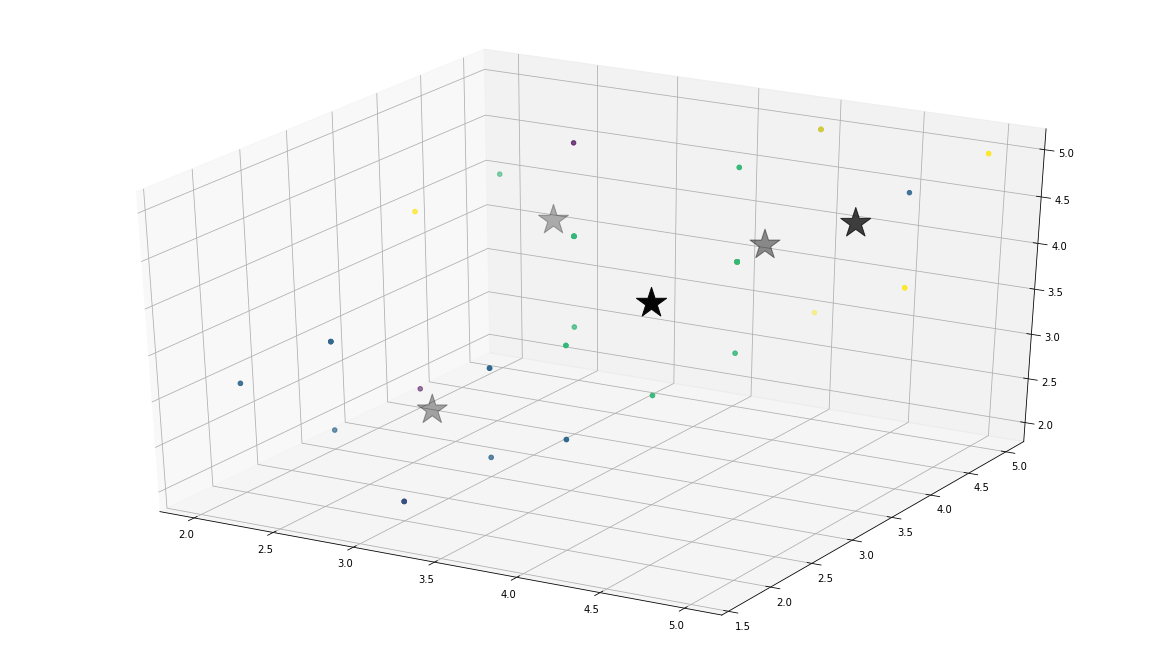

In [71]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X['Q3'], X['Q5'], X['Q7'], c=y['Q12'])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

## when K = 6

In [72]:
# Initializing KMeans
kmeans = KMeans(n_clusters=6)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)

[[4.05405405 4.08108108 4.10810811]
 [3.66666667 2.22222222 2.44444444]
 [2.4        3.1        2.7       ]
 [4.66666667 1.66666667 4.77777778]
 [2.76470588 4.17647059 4.17647059]
 [5.         3.48       4.96      ]]


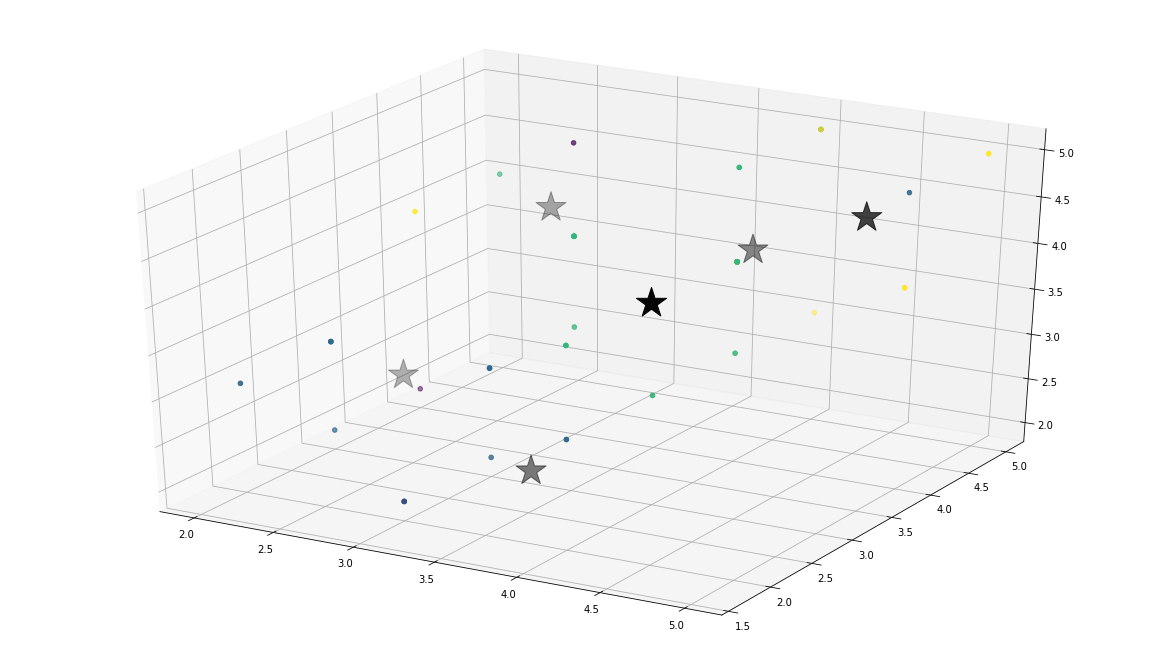

In [73]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X['Q3'], X['Q5'], X['Q7'], c=y['Q12'])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

## Elbow method

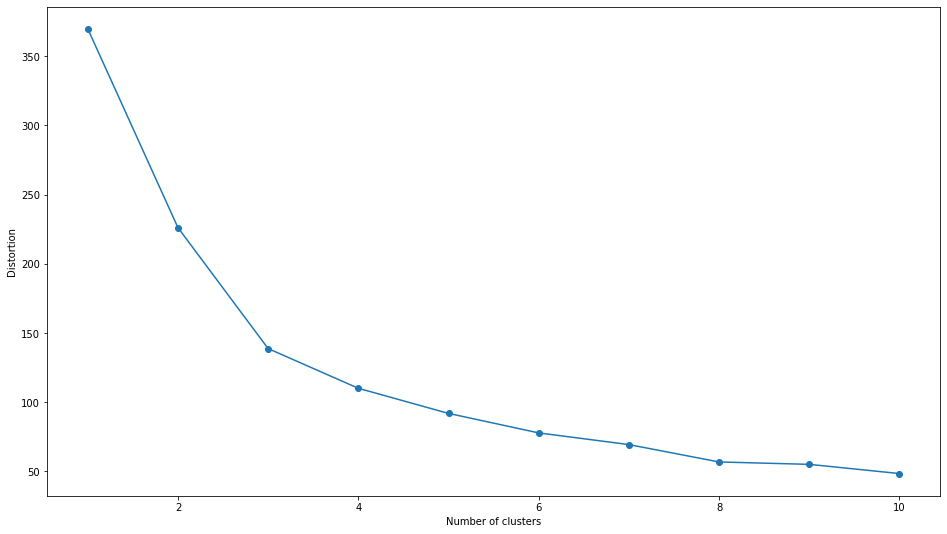

In [74]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [75]:
# As we can see in the resulting plot, the elbow is located at k = 3 (elbow is located at where the distortion decreases the most rapid)

a cluster represents how many groups of data we choose to have as a result, the more clusters we have the more groups we have between our data
it is important to choose the appropriate amount because too few or too many clusters may cause incorrect results
too few clusters, the wanted data may be hidden between the cluster
too many clusters, the similar scale of data may be separated and cause unwanted results

we keep on checking the shortest distance between clusters until there is no change.
